In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_rank = pd.read_csv('sample_submission.csv')
print(df_train.shape)
print(df_test.shape)

(96294, 15)
(64197, 14)


In [90]:
import matplotlib.font_manager as fm

# 설치된 폰트 중 '나눔고딕'을 찾아서 그 경로를 가져옵니다.
font_path = fm.findfont(fm.FontProperties(family='AppleGothic'))

# 가져온 경로를 matplotlib의 폰트로 설정합니다.
plt.rcParams['font.family'] = 'AppleGothic'

# 필요한 경우, 폰트 사이즈도 변경할 수 있습니다.
plt.rcParams['font.size'] = 12

In [110]:
df_train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
5,TRAIN_00005,4800000,36 months,10,RENT,84000000,13.78,30,휴가,0,240216,55428.0,0.0,0.0,A


In [126]:
print('대출기간: ', df_train['대출기간'].unique())
print('근로기간: ', df_train['근로기간'].unique())
print('주택소유상태: ', df_train['주택소유상태'].unique())
print('대출목적: ', df_train['대출목적'].unique())

대출기간:  [36 60]
근로기간:  [ 6 10  5  8  9  2  1  3  7  4]
주택소유상태:  ['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적:  ['부채 통합' '주택 개선' '휴가' '의료' '자동차' '기타' '신용 카드' '주요 구매' '이사' '소규모 사업' '주택'
 '재생 에너지']


In [118]:
df_train = df_train[df_train['근로기간']!='Unknown']
print('근로기간: ', df_train['근로기간'].unique())

근로기간:  [ 6 10  5  8  9  2  1  3  7  4]


In [125]:
df_train["근로기간"] = df_train["근로기간"].replace("6 years", 6)
df_train["근로기간"] = df_train["근로기간"].replace("10+ years", 10)
df_train["근로기간"] = df_train["근로기간"].replace("5 years", 5)
df_train["근로기간"] = df_train["근로기간"].replace("8 years", 8)
df_train["근로기간"] = df_train["근로기간"].replace("9 years", 9)
df_train["근로기간"] = df_train["근로기간"].replace("2 years", 2)
df_train["근로기간"] = df_train["근로기간"].replace("1 year", 1)
df_train["근로기간"] = df_train["근로기간"].replace("3 years", 3)
df_train["근로기간"] = df_train["근로기간"].replace("7 years", 7)
df_train["근로기간"] = df_train["근로기간"].replace("4 years", 4)
df_train["근로기간"] = df_train["근로기간"].replace("10+years", 10)
df_train["근로기간"] = df_train["근로기간"].replace("<1 year", 1)
df_train["근로기간"] = df_train["근로기간"].replace("1 years", 1)
df_train["근로기간"] = df_train["근로기간"].replace("< 1 year", 1)
df_train["근로기간"] = df_train["근로기간"].replace("3", 3)

df_train["대출기간"] = df_train["대출기간"].replace(" 36 months", 36)
df_train["대출기간"] = df_train["대출기간"].replace(" 60 months", 60)

df_test["근로기간"] = df_test["근로기간"].replace("6 years", 6)
df_test["근로기간"] = df_test["근로기간"].replace("10+ years", 10)
df_test["근로기간"] = df_test["근로기간"].replace("5 years", 5)
df_test["근로기간"] = df_test["근로기간"].replace("8 years", 8)
df_test["근로기간"] = df_test["근로기간"].replace("9 years", 9)
df_test["근로기간"] = df_test["근로기간"].replace("2 years", 2)
df_test["근로기간"] = df_test["근로기간"].replace("1 year", 1)
df_test["근로기간"] = df_test["근로기간"].replace("3 years", 3)
df_test["근로기간"] = df_test["근로기간"].replace("7 years", 7)
df_test["근로기간"] = df_test["근로기간"].replace("4 years", 4)
df_test["근로기간"] = df_test["근로기간"].replace("10+years", 10)
df_test["근로기간"] = df_test["근로기간"].replace("<1 year", 1)
df_test["근로기간"] = df_test["근로기간"].replace("1 years", 1)
df_test["근로기간"] = df_test["근로기간"].replace("< 1 year", 1)
df_test["근로기간"] = df_test["근로기간"].replace("3", 3)

In [95]:
df_null = df_train.isnull() # True/False 값으로 결측치 확인
df_null.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
df_null.sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [97]:
df_train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.062300e+04,9.062300e+04,90623.000000,90623.000000,90623.000000,9.062300e+04,9.062300e+04,90623.000000,90623.000000
mean,1.856741e+07,9.602653e+07,19.170749,25.392119,0.349735,8.326541e+05,4.350714e+05,53.536078,0.005915
std,1.035141e+07,1.018085e+08,8.669904,12.109055,0.925710,1.042277e+06,4.441825e+05,1396.603298,0.080745
min,1.200000e+06,6.432000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.080000e+07,5.880000e+07,12.600000,17.000000,0.000000,3.126360e+05,1.378380e+05,0.000000,0.000000
50%,1.728000e+07,8.160000e+07,18.630000,24.000000,0.000000,6.047280e+05,2.934120e+05,0.000000,0.000000
75%,2.448000e+07,1.140000e+08,25.410000,32.000000,0.000000,1.067496e+06,5.794080e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,100.090000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [98]:
df_train.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [99]:
feature_columns = df_train.columns[:-1].tolist()

In [100]:
df_train['대출등급'].value_counts()

대출등급
B    27075
C    25995
A    15838
D    12482
E     6976
F     1862
G      395
Name: count, dtype: int64

In [101]:
df_train['대출등급'].value_counts(normalize=True) * 100

대출등급
B    29.876521
C    28.684771
A    17.476799
D    13.773545
E     7.697825
F     2.054666
G     0.435872
Name: proportion, dtype: float64

<AxesSubplot:xlabel='대출등급', ylabel='count'>

/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

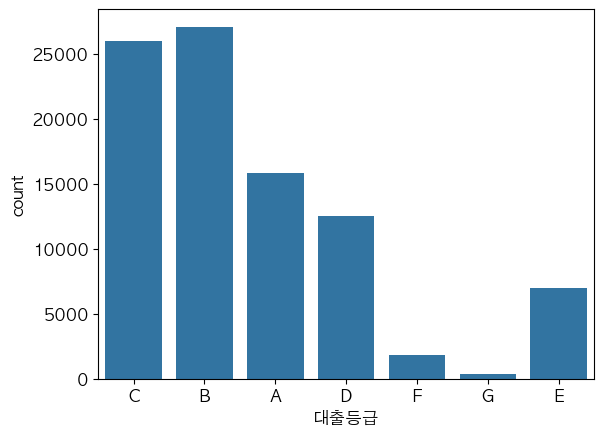

In [102]:
sns.countplot(data=df_train, x='대출등급')

In [103]:
df_train.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [104]:
X_train = df_train[['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']]
y_train = df_train['대출등급']

X_test = df_test[['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']]
y_test = df_rank['대출등급']  

X_train

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0
1,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0
2,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0
3,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0
5,4800000,36 months,10,RENT,84000000,13.78,30,휴가,0,240216,55428.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0
96290,28800000,60 months,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0
96291,14400000,36 months,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0
96292,15600000,36 months,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42), 
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [106]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([ 4, 13, 19, 14, 18, 19, 14, 15,  7, 10])

In [107]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.46758871, 0.3392114 , 0.49567133, 0.52478434, 0.49910746,
       0.59189403, 0.58031886, 0.35623473, 0.35051707, 0.68993513])

In [108]:
results = []

for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [109]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'max_depth': max_depth, 'max_features': max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators'] = np.random.randint(100, 200, 10)
    clf = RandomizedSearchCV(estimator, param_distributions, n_iter=100, scoring='accuracy', n_jobs=-1, cv=5, verbose=2)

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test,y_test))
    result.append(clf.cv_results_)
    results.append(result)
results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......max_depth=4, max_features=0.46758871065397395; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.46758871065397395; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.46758871065397395; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.46758871065397395; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.46758871065397395; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.33921139550080964; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.33921139550080964; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.33921139550080964; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.33921139550080964; total time=   0.0s
[CV] END ......max_depth=4, max_features=0.33921139550080964; total time=   0.0s
[CV] END .......max_depth=4, max_features=0.4956713252873144; total time=   0.0s
[CV] END .......max_depth=4, max_features=0.49

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 959, in fit
    super()._fit(
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 242, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 617, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: ' 36 months'
